# 데이터 준비 및 전처리

In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

## 데이터 불러오기

In [2]:
df = pd.read_csv('data/superheroes_nlp_dataset.csv')
df.head()

,name,real_name,full_name,overall_score,history_text,powers_text,intelligence_score,strength_score,speed_score,durability_score,...,has_flight,has_accelerated_healing,has_weapons_master,has_intelligence,has_reflexes,has_super_speed,has_durability,has_stamina,has_agility,has_super_strength
0,3-D Man,"Delroy Garrett, Jr.","Delroy Garrett, Jr.",6,"Delroy Garrett, Jr. grew up to become a track ...",NaN,85,30,60,60,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,514A (Gotham),Bruce Wayne,NaN,10,He was one of the many prisoners of Indian Hil...,NaN,100,20,30,50,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
2,A-Bomb,Richard Milhouse Jones,Richard Milhouse Jones,20,"Richard ""Rick"" Jones was orphaned at a young ...","On rare occasions, and through unusual circu...",80,100,80,100,...,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0
3,Aa,Aa,NaN,12,Aa is one of the more passive members of the P...,NaN,80,50,55,45,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Aaron Cash,Aaron Cash,Aaron Cash,5,Aaron Cash is the head of security at Arkham A...,NaN,80,10,25,40,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1450 entries, 0 to 1449
Data columns (total 81 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   name                              1448 non-null   object 
 1   real_name                         1301 non-null   object 
 2   full_name                         956 non-null    object 
 3   overall_score                     1450 non-null   object 
 4   history_text                      1360 non-null   object 
 5   powers_text                       1086 non-null   object 
 6   intelligence_score                1450 non-null   int64  
 7   strength_score                    1450 non-null   int64  
 8   speed_score                       1450 non-null   int64  
 9   durability_score                  1450 non-null   int64  
 10  power_score                       1450 non-null   int64  
 11  combat_score                      1450 non-null   int64  
 12  superp

In [4]:
df[df['name'] == 'Iron Man (MCU)']

,name,real_name,full_name,overall_score,history_text,powers_text,intelligence_score,strength_score,speed_score,durability_score,...,has_flight,has_accelerated_healing,has_weapons_master,has_intelligence,has_reflexes,has_super_speed,has_durability,has_stamina,has_agility,has_super_strength
647,Iron Man (MCU),Tony Stark,Anthony Edward Stark,13,Tony Stark is a genius billionaire playboy phi...,NaN,100,80,55,80,...,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0


In [5]:
df[df['name'] == 'Captain America (Venomized)']

,name,real_name,full_name,overall_score,history_text,powers_text,intelligence_score,strength_score,speed_score,durability_score,...,has_flight,has_accelerated_healing,has_weapons_master,has_intelligence,has_reflexes,has_super_speed,has_durability,has_stamina,has_agility,has_super_strength
254,Captain America (Venomized),Steve Rogers,"Steven ""Steve"" Rogers",14,"In all of history, only two men have received ...",NaN,75,40,50,50,...,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


## 사용할 컬럼 선택

In [6]:
df1 = df.iloc[:, [0,3,6,7,8,9,10,11]]
df1

,name,overall_score,intelligence_score,strength_score,speed_score,durability_score,power_score,combat_score
0,3-D Man,6,85,30,60,60,40,70
1,514A (Gotham),10,100,20,30,50,35,100
2,A-Bomb,20,80,100,80,100,100,80
3,Aa,12,80,50,55,45,100,55
4,Aaron Cash,5,80,10,25,40,30,50
...,...,...,...,...,...,...,...,...
1445,Zatanna,10,90,10,25,30,100,55
1446,Zero,18,80,100,100,100,100,80
1447,Zoom (New 52),20,95,50,100,75,100,80
1448,Zoom,9,75,10,100,30,100,30


## 결측값 제거

In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1450 entries, 0 to 1449
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   name                1448 non-null   object
 1   overall_score       1450 non-null   object
 2   intelligence_score  1450 non-null   int64 
 3   strength_score      1450 non-null   int64 
 4   speed_score         1450 non-null   int64 
 5   durability_score    1450 non-null   int64 
 6   power_score         1450 non-null   int64 
 7   combat_score        1450 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 90.8+ KB


In [8]:
df1.isnull().sum()

name                  2
overall_score         0
intelligence_score    0
strength_score        0
speed_score           0
durability_score      0
power_score           0
combat_score          0
dtype: int64

In [9]:
df1 = df1.dropna()
df1.isnull().sum()

name                  0
overall_score         0
intelligence_score    0
strength_score        0
speed_score           0
durability_score      0
power_score           0
combat_score          0
dtype: int64

In [10]:
df1.shape

(1448, 8)

In [11]:
df1.head()

,name,overall_score,intelligence_score,strength_score,speed_score,durability_score,power_score,combat_score
0,3-D Man,6,85,30,60,60,40,70
1,514A (Gotham),10,100,20,30,50,35,100
2,A-Bomb,20,80,100,80,100,100,80
3,Aa,12,80,50,55,45,100,55
4,Aaron Cash,5,80,10,25,40,30,50


## overall_score 살펴보기

In [12]:
df1['overall_score'].unique()

array(['6', '10', '20', '12', '5', '8', '9', '22', '13', '29', '∞', '7',
       '19', '2', '15', '14', '50', '34', '35', '-', '4', '37', '3', '70',
       '11', '21', '67', '32', '222', '1', '16', '18', '80', '17', '28',
       '42', '117', '30', '71', '130', '84', '73', '23', '112', '229',
       '24', '61', '120', '40', '142', '124', '211', '27', '54', '33',
       '57', '169', '226', '77', '237', '26', '41', '38', '47', '46',
       '87', '25', '60', '82', '89', '78', '69', '43', '66', '62', '31',
       '64', '49', '58', '126', '163', '65', '100', '108', '125', '94',
       '75', '53', '152', '165', '83', '68', '146'], dtype=object)

In [13]:
df1[df1['overall_score'] == '0']

,name,overall_score,intelligence_score,strength_score,speed_score,durability_score,power_score,combat_score


In [14]:
df1.loc[df1['overall_score'] == '-', 'overall_score'] = 0 # 능력치가 -라는 것은 0과 비슷하다고 생각
df1.loc[df1['overall_score'] == '∞', 'overall_score'] = 300 # 능력치가 무한대 -> 최댓값보다 크게 잡아줌
df1['overall_score'] = df1['overall_score'].astype('int')

In [15]:
df1.describe()

,overall_score,intelligence_score,strength_score,speed_score,durability_score,power_score,combat_score
count,1448.000000,1448.000000,1448.000000,1448.000000,1448.000000,1448.000000,1448.000000
mean,17.052486,79.212707,39.513122,46.453729,56.270718,67.006215,68.270028
std,38.309401,24.892339,34.377993,29.175077,31.600498,33.154754,29.451815
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,75.000000,10.000000,25.000000,30.000000,40.000000,55.000000
50%,8.000000,85.000000,30.000000,40.000000,55.000000,75.000000,75.000000
75%,13.000000,95.000000,65.000000,65.000000,85.000000,100.000000,90.000000
max,300.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000


# EDA

## boxplot으로 이상치 확인

<Axes: >

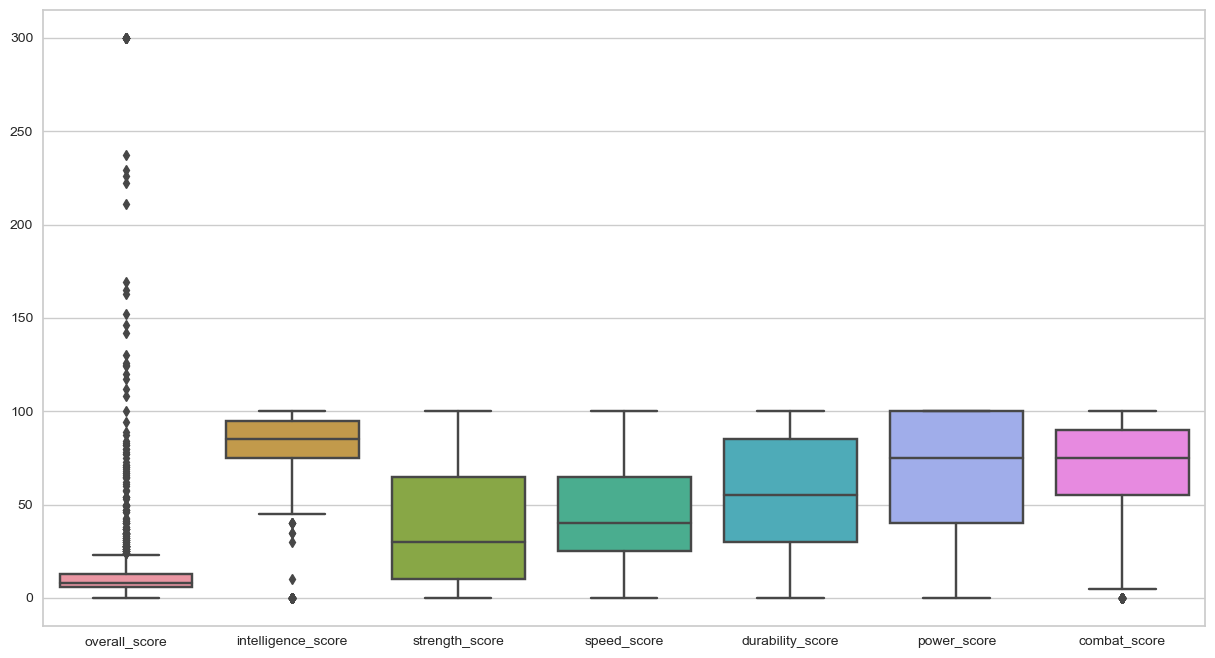

In [16]:
plt.figure(figsize=(15,8))
sns.boxplot(data=df1)

In [17]:
df1['overall_score'].describe()

count    1448.000000
mean       17.052486
std        38.309401
min         0.000000
25%         6.000000
50%         8.000000
75%        13.000000
max       300.000000
Name: overall_score, dtype: float64

In [18]:
# overall_score 이상치 제거
Q1 = df1['overall_score'].quantile(0.25)
Q3 = df1['overall_score'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df1 = df1[df1['overall_score'].between(lower_bound, upper_bound, inclusive=True)]

In [19]:
# intelligence_score 이상치 제거
Q1 = df1['intelligence_score'].quantile(0.25)
Q3 = df1['intelligence_score'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df1 = df1[df1['intelligence_score'].between(lower_bound, upper_bound, inclusive=True)]

In [20]:
df1.shape

(1174, 8)

<Axes: >

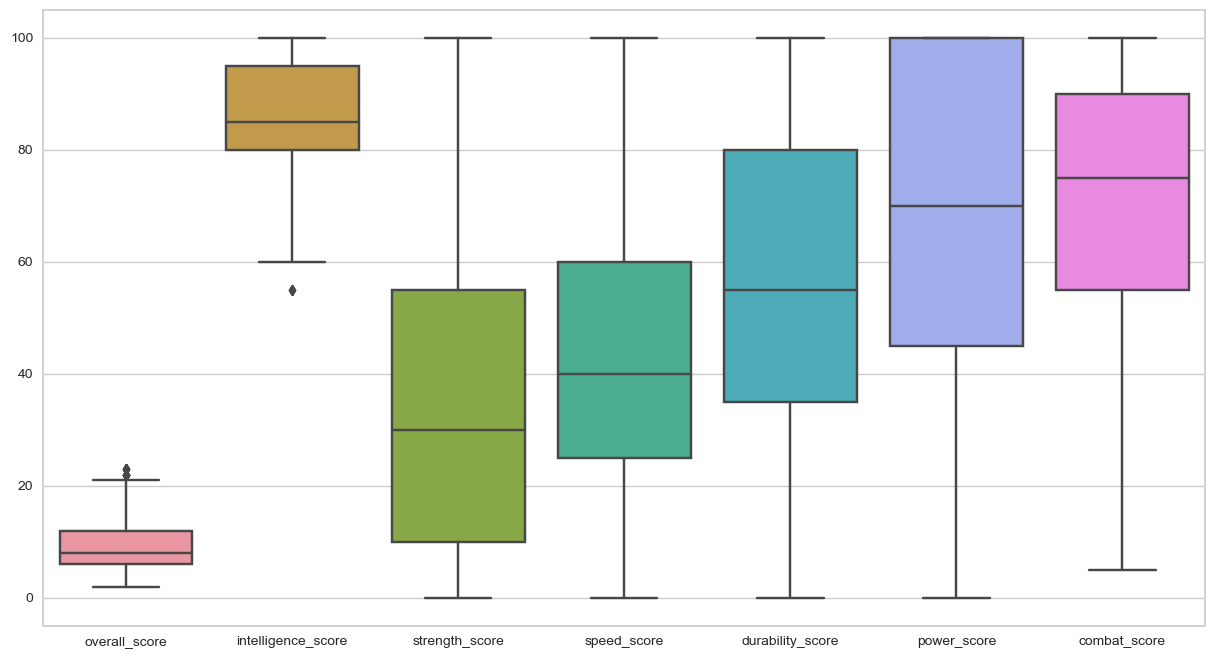

In [21]:
plt.figure(figsize=(15,8))
sns.boxplot(data=df1)

## 히스토그램

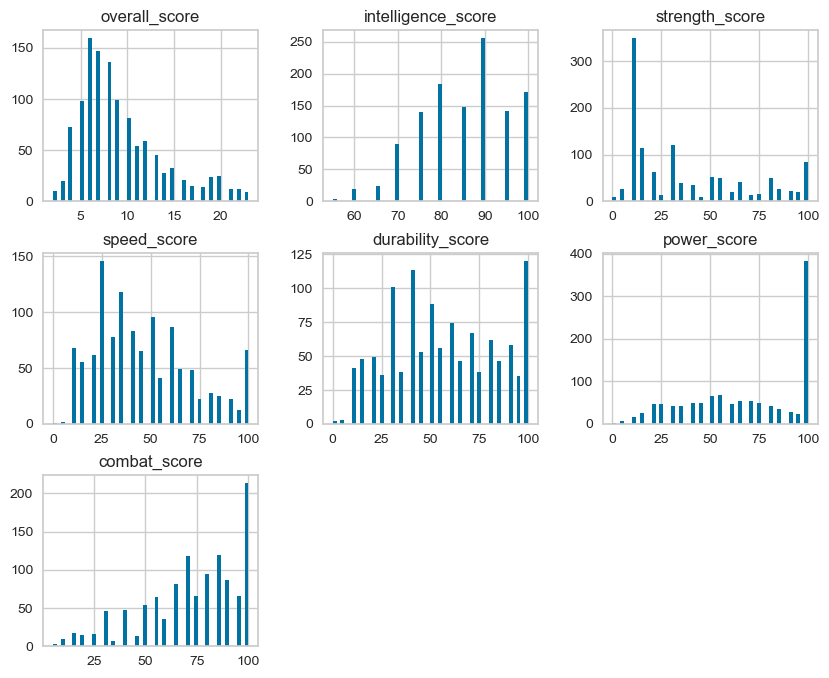

In [22]:
df1.hist(bins=50, figsize=(10,8));

## Scaling
### StandardScaler

In [23]:
df1.head()

,name,overall_score,intelligence_score,strength_score,speed_score,durability_score,power_score,combat_score
0,3-D Man,6,85,30,60,60,40,70
1,514A (Gotham),10,100,20,30,50,35,100
2,A-Bomb,20,80,100,80,100,100,80
3,Aa,12,80,50,55,45,100,55
4,Aaron Cash,5,80,10,25,40,30,50


In [24]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_mM = scaler.fit_transform(df1.iloc[:, 1:])
scaled_mM

array([[0.19047619, 0.66666667, 0.3       , ..., 0.6       , 0.4       ,
        0.68421053],
       [0.38095238, 1.        , 0.2       , ..., 0.5       , 0.35      ,
        1.        ],
       [0.85714286, 0.55555556, 1.        , ..., 1.        , 1.        ,
        0.78947368],
       ...,
       [0.76190476, 0.55555556, 1.        , ..., 1.        , 1.        ,
        0.78947368],
       [0.85714286, 0.88888889, 0.5       , ..., 0.75      , 1.        ,
        0.78947368],
       [0.33333333, 0.44444444, 0.1       , ..., 0.3       , 1.        ,
        0.26315789]])

In [25]:
# 데이터 프레임으로 저장
df_scaled_mM = pd.DataFrame(scaled_mM)
df_scaled_mM.head()

,0,1,2,3,4,5,6
0,0.190476,0.666667,0.3,0.60,0.60,0.40,0.684211
1,0.380952,1.000000,0.2,0.30,0.50,0.35,1.000000
2,0.857143,0.555556,1.0,0.80,1.00,1.00,0.789474
3,0.476190,0.555556,0.5,0.55,0.45,1.00,0.526316
4,0.142857,0.555556,0.1,0.25,0.40,0.30,0.473684


In [26]:
df1.columns

Index(['name', 'overall_score', 'intelligence_score', 'strength_score',
       'speed_score', 'durability_score', 'power_score', 'combat_score'],
      dtype='object')

In [27]:
df1.columns[1:]

Index(['overall_score', 'intelligence_score', 'strength_score', 'speed_score',
       'durability_score', 'power_score', 'combat_score'],
      dtype='object')

In [28]:
df_scaled_mM.columns = df1.columns[1:]
df_scaled_mM.head()

,overall_score,intelligence_score,strength_score,speed_score,durability_score,power_score,combat_score
0,0.190476,0.666667,0.3,0.60,0.60,0.40,0.684211
1,0.380952,1.000000,0.2,0.30,0.50,0.35,1.000000
2,0.857143,0.555556,1.0,0.80,1.00,1.00,0.789474
3,0.476190,0.555556,0.5,0.55,0.45,1.00,0.526316
4,0.142857,0.555556,0.1,0.25,0.40,0.30,0.473684


# 차원축소 feature 생성

[0.52020652 0.15163225]


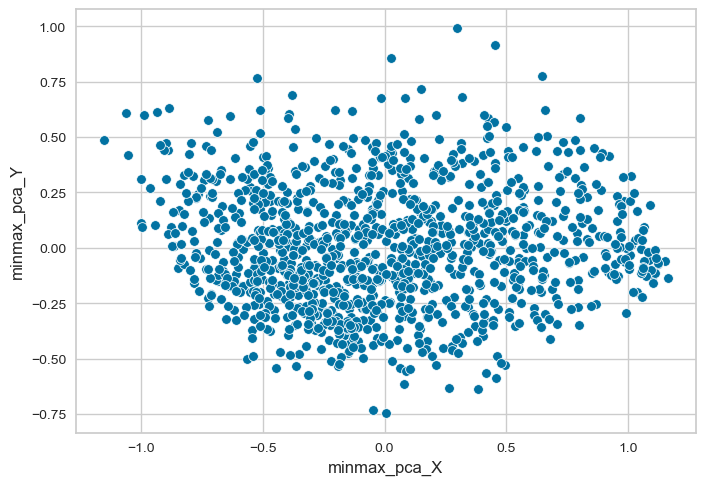

In [29]:
pca = PCA(n_components=2)
result_pca = pca.fit_transform(scaled_mM)
df_scaled_mM[['minmax_pca_X', 'minmax_pca_Y']] = result_pca
print(pca.explained_variance_ratio_)

sns.scatterplot(data = df_scaled_mM, x = 'minmax_pca_X', y = 'minmax_pca_Y')
plt.savefig('images/pca.png')

# KMeans

In [30]:
inertia = []
silhouettes = []
range_n_clusters = range(2, 20)

for n_cluster in range_n_clusters:
    kmeans = KMeans(n_clusters=n_cluster, random_state=42)
    kmeans.fit(df_scaled_mM[['minmax_pca_X', 'minmax_pca_Y']])
    
    inertia.append(kmeans.inertia_)
    silhouettes.append(silhouette_score(df_scaled_mM[['minmax_pca_X', 'minmax_pca_Y']], labels=kmeans.labels_))
    
    print(n_cluster, end=',')

2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,

## Elbow method

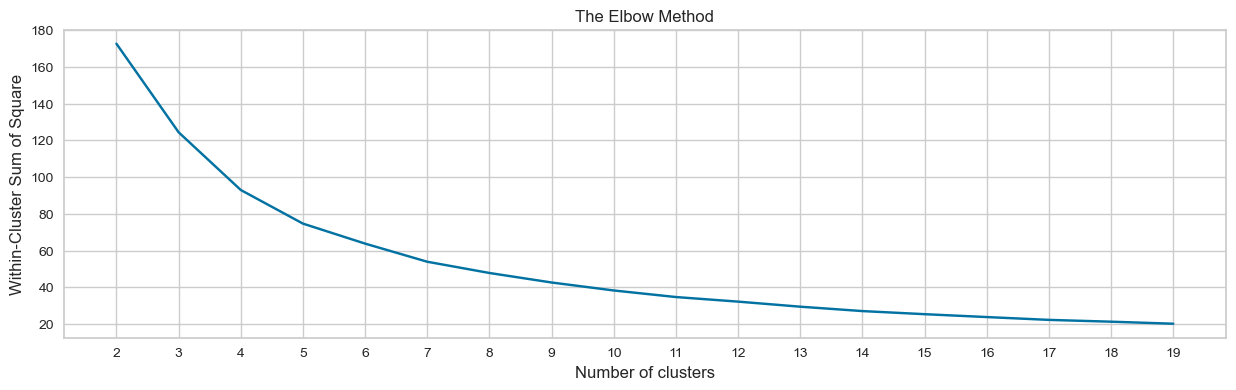

In [31]:
plt.figure(figsize=(15,4))
plt.plot(range_n_clusters, inertia)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Within-Cluster Sum of Square')
plt.xticks(range_n_clusters)
plt.savefig('images/elbow method.png')

## 실루엣 계수

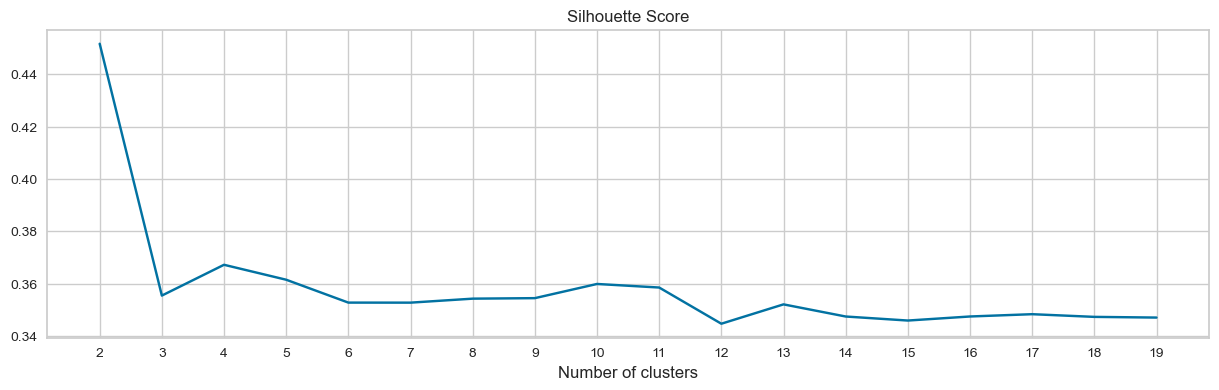

In [32]:
plt.figure(figsize=(15, 4))
plt.title('Silhouette Score')
plt.plot(range_n_clusters, silhouettes)
plt.xticks(range_n_clusters)
plt.xlabel('Number of clusters')
plt.savefig('images/silhouette score.png')

## KElbowVisualizer

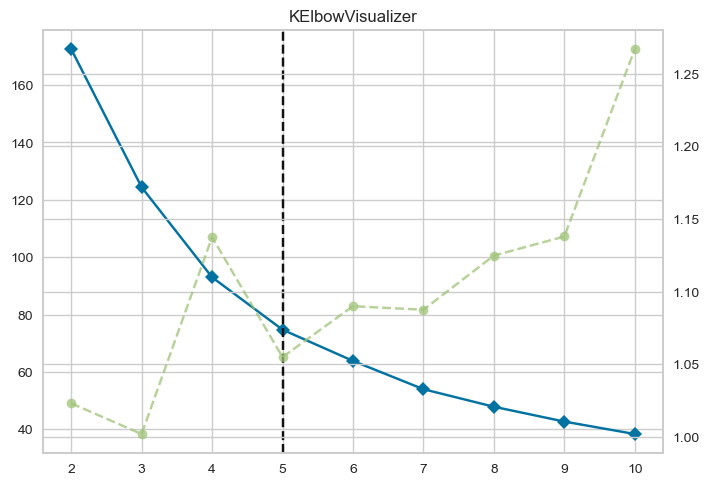

In [33]:
from yellowbrick.cluster import KElbowVisualizer

KEV = KElbowVisualizer(kmeans, k=10, n_init="auto")
KEV.fit(df_scaled_mM[['minmax_pca_X', 'minmax_pca_Y']])
plt.title('KElbowVisualizer')
plt.savefig('images/KElbowVisualizer.png')

## 분석한 내용을 바탕으로 KMeans n_clusters 값을 정해 학습하기

In [34]:
n_clusters = 5
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(df_scaled_mM[['minmax_pca_X', 'minmax_pca_Y']])

KMeans(n_clusters=5, random_state=42)

In [35]:
# silhouette_score 구하기
silhouette_avg = silhouette_score(df_scaled_mM[['minmax_pca_X', 'minmax_pca_Y']], kmeans.labels_)
silhouette_avg

0.3614713657576252

In [36]:
pd.Series(kmeans.labels_).value_counts()

0    330
3    228
4    221
2    204
1    191
dtype: int64

In [37]:
df1['Cluster'] = kmeans.labels_
df1.head()

,name,overall_score,intelligence_score,strength_score,speed_score,durability_score,power_score,combat_score,Cluster
0,3-D Man,6,85,30,60,60,40,70,2
1,514A (Gotham),10,100,20,30,50,35,100,0
2,A-Bomb,20,80,100,80,100,100,80,1
3,Aa,12,80,50,55,45,100,55,2
4,Aaron Cash,5,80,10,25,40,30,50,3


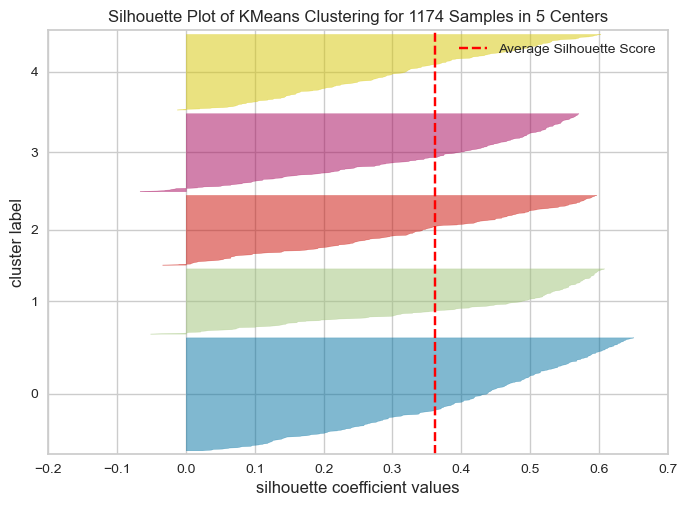

Silhouette Coefficient: 0.3615


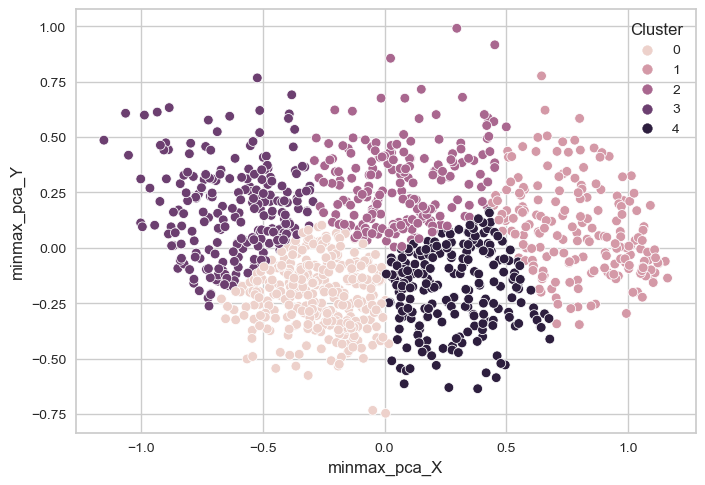

In [38]:
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn import metrics

i = n_clusters
kmeans = KMeans(n_clusters=i, random_state=42,init='k-means++')
visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')
visualizer.fit(df_scaled_mM[['minmax_pca_X', 'minmax_pca_Y']])
plt.savefig('images/visualizer.png')
visualizer.show()
    
kmeans = KMeans(n_clusters=i, random_state=42)
label = kmeans.fit_predict(df_scaled_mM[['minmax_pca_X', 'minmax_pca_Y']])
df_scaled_mM['Cluster'] = label

sns.scatterplot(data = df_scaled_mM, x = 'minmax_pca_X', y = 'minmax_pca_Y', hue = 'Cluster')
plt.savefig('images/kmeans.png')

print('Silhouette Coefficient: {:.4f}'.format(metrics.silhouette_score(df_scaled_mM[['minmax_pca_X', 'minmax_pca_Y']], df_scaled_mM['Cluster'])))

## 결과 확인

In [39]:
# Iron Man의 클러스터 확인
df1[df1['name'] == 'Iron Man']['Cluster']

652    1
Name: Cluster, dtype: int32

In [40]:
# Captain America의 클러스터 확인
df1[df1['name'] == 'Captain America (EMH)']['Cluster']

253    0
Name: Cluster, dtype: int32

In [41]:
iron_df = df1[df1['Cluster'] == 1]
iron_df

,name,overall_score,intelligence_score,strength_score,speed_score,durability_score,power_score,combat_score,Cluster
2,A-Bomb,20,80,100,80,100,100,80,1
8,Abomination,22,85,100,80,90,100,95,1
13,Absorbing Man,13,70,80,25,100,100,65,1
15,Achilles Warkiller,19,90,100,75,100,100,100,1
30,Air-Walker,15,75,85,100,85,100,40,1
...,...,...,...,...,...,...,...,...,...
1421,Wonder Woman,17,95,100,80,100,100,100,1
1431,XS (CW),19,90,55,100,60,100,65,1
1432,Yang,15,70,100,100,95,100,100,1
1446,Zero,18,80,100,100,100,100,80,1


In [42]:
cap_df = df1[df1['Cluster'] == 0]
cap_df

,name,overall_score,intelligence_score,strength_score,speed_score,durability_score,power_score,combat_score,Cluster
1,514A (Gotham),10,100,20,30,50,35,100,0
5,Aayla Secura,8,90,40,45,55,55,85,0
9,Abra Kadabra (CW),13,100,10,20,30,100,55,0
12,Absorbing Man (MCU),8,75,15,30,40,100,85,0
19,Adam Strange,7,90,10,35,40,55,70,0
...,...,...,...,...,...,...,...,...,...
1412,Wizard,11,100,10,30,30,95,25,0
1440,Yondu (MCU),7,85,25,40,40,60,80,0
1441,Yondu,5,75,15,30,50,60,80,0
1442,Yukio (FOX),5,80,10,50,30,45,100,0


In [43]:
iron_df.describe()

,overall_score,intelligence_score,strength_score,speed_score,durability_score,power_score,combat_score,Cluster
count,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,191.0
mean,15.821990,87.172775,87.251309,77.068063,91.335079,96.623037,82.513089,1.0
std,3.727528,9.534784,16.235429,19.236494,10.421273,8.809940,16.621754,0.0
min,7.000000,60.000000,30.000000,25.000000,60.000000,65.000000,20.000000,1.0
25%,13.000000,80.000000,80.000000,65.000000,85.000000,100.000000,75.000000,1.0
50%,15.000000,90.000000,95.000000,80.000000,95.000000,100.000000,85.000000,1.0
75%,19.000000,95.000000,100.000000,95.000000,100.000000,100.000000,100.000000,1.0
max,23.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,1.0


In [44]:
cap_df.describe()

,overall_score,intelligence_score,strength_score,speed_score,durability_score,power_score,combat_score,Cluster
count,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.0
mean,7.996970,90.075758,15.045455,34.212121,39.015152,58.090909,81.227273,0.0
std,2.427675,7.318857,8.589652,14.439387,14.185583,23.850298,18.856195,0.0
min,4.000000,70.000000,0.000000,5.000000,10.000000,10.000000,5.000000,0.0
25%,6.000000,85.000000,10.000000,25.000000,30.000000,40.000000,70.000000,0.0
50%,8.000000,90.000000,10.000000,30.000000,40.000000,55.000000,85.000000,0.0
75%,9.000000,95.000000,15.000000,45.000000,50.000000,75.000000,100.000000,0.0
max,23.000000,100.000000,55.000000,100.000000,100.000000,100.000000,100.000000,0.0


In [45]:
# 아이언맨 군집과 캡틴아메리카 군집의 평균 능력치 비교
iron = pd.DataFrame(iron_df.describe().iloc[1,1:7])
cap = pd.DataFrame(cap_df.describe().iloc[1,1:7])

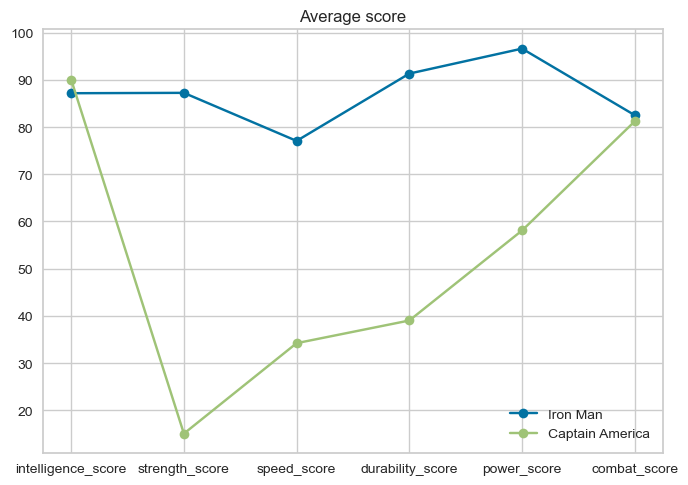

In [46]:
# 아이언맨 군집과 캡틴아메리카 군집의 평균 능력치 시각화
plt.plot(iron, marker='o')
plt.plot(cap, marker='o')
plt.title('Average score')
plt.legend(labels=['Iron Man', 'Captain America'])
plt.savefig('images/iron_captain.png')